# Project 3 - BANK MARKETING
Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes

Here is the description of all the variables:

•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign


Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)



Dataset Link-
•	https://github.com/dsrscientist/dataset5
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv


In [1]:
import pandas as pd
import numpy as np                     
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings              
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
df_train.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [4]:
df_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [5]:
df_test.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [6]:
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [8]:
df_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [16]:
df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [17]:
df_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [18]:
df_train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [41]:
corr=df_train.corr()
corr

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


As we can see, there is no subscribed (target) present in test dataset. 

<AxesSubplot:xlabel='marital', ylabel='count'>

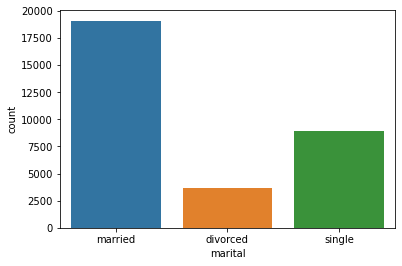

In [15]:
sns.countplot(df_train['marital'])


<AxesSubplot:xlabel='age', ylabel='count'>

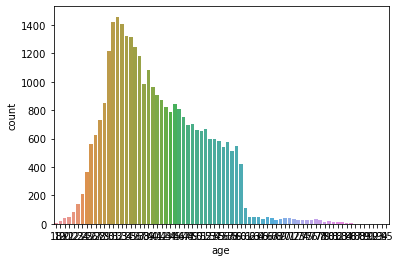

In [13]:
sns.countplot(df_train['age'])

<AxesSubplot:xlabel='subscribed', ylabel='count'>

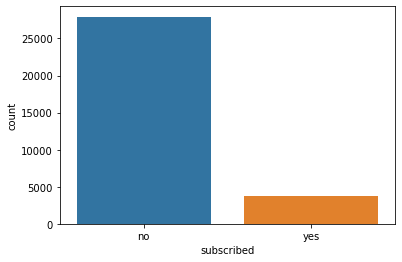

In [21]:
sns.countplot(df_train['subscribed'])

In [23]:
df_train['subscribed'].value_counts(normalize = True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

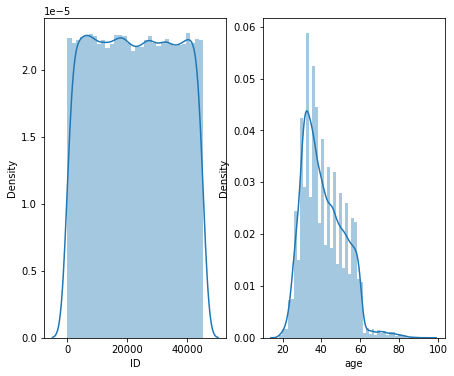

In [32]:
df1 = ['ID', 'age']
plt.subplots(figsize=(15, 20))
for i, column in enumerate(df1):
    plt.subplot(3,4, i + 1)
    sns.distplot(df_train[column])
plt.show()

<AxesSubplot:xlabel='job', ylabel='count'>

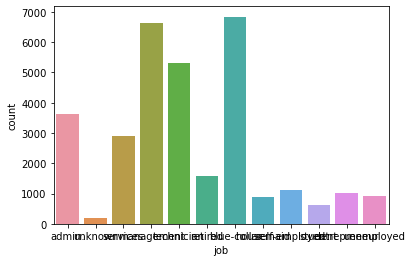

In [36]:
sns.countplot(df_train['job'])

<AxesSubplot:xlabel='default', ylabel='count'>

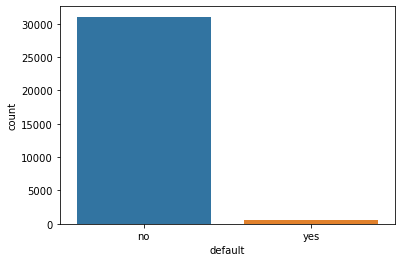

In [37]:
sns.countplot(df_train['default'])

In [38]:
pd.crosstab(df_train['job'],df_train['subscribed'])

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


<AxesSubplot:xlabel='subscribed', ylabel='job'>

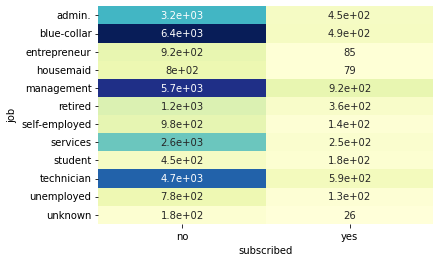

In [40]:
sns.heatmap(pd.crosstab(df_train['job'],df_train['subscribed']), cmap="YlGnBu", annot=True, cbar=False)

Text(0, 0.5, 'Percentage')

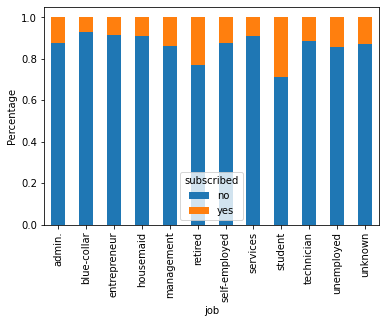

In [43]:
job = pd.crosstab(df_train['job'],df_train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('job')
plt.ylabel('Percentage')

In [44]:
pd.crosstab(df_train['default'],df_train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


Text(0, 0.5, 'Percentage')

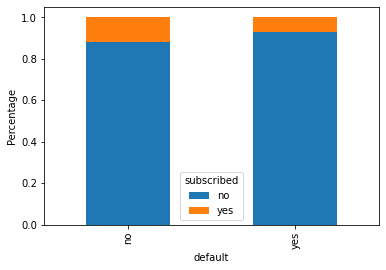

In [45]:
default = pd.crosstab(df_train['default'],df_train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('default')
plt.ylabel('Percentage')

In [ ]:
df_train['subscribed'].replace('no', 0,inplace=True)
df_train['subscribed'].replace('yes', 1,inplace=True)

<AxesSubplot:>

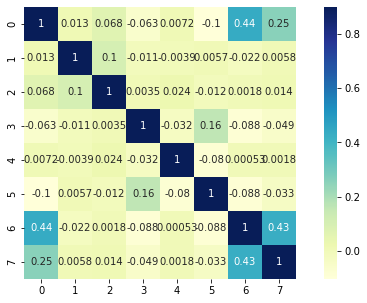

In [60]:
corr = df_train.corr()
mask = np.tri(corr.shape[0], k=1)
corr_masked = np.ma.array(corr, mask=mask)
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr_masked, vmax=0.9, square=True, annot=True, cmap="YlGnBu")

In [61]:
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

.There is no missing value, now we can start with building the medoel

In [69]:
x = df_train.drop('subscribed', axis=1)
y = df_train['subscribed']

In [70]:
x = pd.get_dummies(df_train)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [74]:
Lr = LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [75]:
y_predict = Lr.predict(x_test)

In [76]:
accuracy_score(y_test, y_predict)

0.8883096366508689

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [80]:
Y_predict = clf.predict(x_test)

In [81]:
accuracy_score(y_test, Y_predict)

1.0

In [100]:
X = pd.get_dummies(df_test)

In [106]:
test_prediction = clf.predict(x_test)

In [104]:
test_prediction

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [108]:
import joblib
joblib.dump(Lr, "Bank_Marketing_Prediction.pkl")

['Bank_Marketing_Prediction.pkl']